## KCB 데이터

In [2]:
import pandas as pd

In [8]:
income = pd.read_csv('KCB 데이터/3_지역단위소득.CSV')
income

,BS_YR_MON,GB,CT_PRVNC_CD,CT_PRVNC_NM,CT_CNTY_GU_CD,CT_CNTY_GU_NM,ADM_DONG_CD,ADM_DONG_NM,GENDER,AGE_CD,...,AVG_ICM_O70,AVG_HSHD_ICM,MED_ICM,RT_ICM_1,RT_ICM_2,RT_ICM_3,RT_ICM_4,RT_ICM_5,RT_ICM_6,RT_ICM_7
0,202001,ADM_DONG,47,경상북도,47190,구미시,47190660,임오동,1,30,...,8040.0,6631,3800.0,0.01,0.21,0.39,0.20,0.11,0.05,0.04
1,202001,ADM_DONG,47,경상북도,47190,구미시,47190660,임오동,1,50,...,9616.0,7211,4100.0,0.00,0.14,0.35,0.24,0.14,0.06,0.08
2,202001,ADM_DONG,47,경상북도,47190,구미시,47190660,임오동,1,70,...,NaN,4272,2300.0,0.32,0.58,0.10,0.01,0.00,0.00,0.00
3,202001,ADM_DONG,47,경상북도,47190,구미시,47190660,임오동,1,60,...,8443.0,5642,2700.0,0.12,0.51,0.24,0.05,0.03,0.02,0.02
4,202001,ADM_DONG,47,경상북도,47190,구미시,47190660,임오동,1,20,...,9065.0,6419,2200.0,0.39,0.49,0.09,0.02,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,202001,ADM_DONG,44,충청남도,44133,천안시서북구,44133250,성환읍,2,30,...,11721.0,6369,2700.0,0.02,0.72,0.23,0.02,0.01,0.00,0.00
96,202001,ADM_DONG,28,인천광역시,28237,부평구,28237582,산곡4동,2,20,...,11820.0,7500,2100.0,0.38,0.57,0.05,0.00,0.00,0.00,0.00
97,202001,ADM_DONG,28,인천광역시,28237,부평구,28237582,산곡4동,2,40,...,9485.0,7345,3300.0,0.01,0.33,0.49,0.11,0.03,0.02,0.02
98,202001,ADM_DONG,28,인천광역시,28237,부평구,28237582,산곡4동,2,60,...,8850.0,5669,2500.0,0.19,0.65,0.13,0.03,0.01,0.00,0.00


In [36]:
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

In [10]:
income.shape

(100, 21)

In [11]:
# AVG_ICM_070 : 상위소득자 평균 연소득
income.isnull().sum()

BS_YR_MON         0
GB                0
CT_PRVNC_CD       0
CT_PRVNC_NM       0
CT_CNTY_GU_CD     0
CT_CNTY_GU_NM     0
ADM_DONG_CD       0
ADM_DONG_NM       0
GENDER            0
AGE_CD            0
AVG_ICM           0
AVG_ICM_O70      24
AVG_HSHD_ICM      0
MED_ICM           0
RT_ICM_1          0
RT_ICM_2          0
RT_ICM_3          0
RT_ICM_4          0
RT_ICM_5          0
RT_ICM_6          0
RT_ICM_7          0
dtype: int64

In [12]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
BS_YR_MON        100 non-null int64
GB               100 non-null object
CT_PRVNC_CD      100 non-null int64
CT_PRVNC_NM      100 non-null object
CT_CNTY_GU_CD    100 non-null int64
CT_CNTY_GU_NM    100 non-null object
ADM_DONG_CD      100 non-null int64
ADM_DONG_NM      100 non-null object
GENDER           100 non-null int64
AGE_CD           100 non-null int64
AVG_ICM          100 non-null int64
AVG_ICM_O70      76 non-null float64
AVG_HSHD_ICM     100 non-null int64
MED_ICM          100 non-null float64
RT_ICM_1         100 non-null float64
RT_ICM_2         100 non-null float64
RT_ICM_3         100 non-null float64
RT_ICM_4         100 non-null float64
RT_ICM_5         100 non-null float64
RT_ICM_6         100 non-null float64
RT_ICM_7         100 non-null float64
dtypes: float64(9), int64(8), object(4)
memory usage: 16.5+ KB


## >> CT_CNTY_GU_NM (지역구), AVG_ICM(평균 연소득), AGE_CD(연령대)

In [47]:
# 지역별, 나이별 평균 연소득 : GroupBy로 구하기

avg_income = income.groupby(['CT_CNTY_GU_NM','AGE_CD'])['AVG_ICM'].mean().round().unstack()
avg_income

AGE_CD,20,30,40,50,60,70
CT_CNTY_GU_NM,,,,,,
고창군,2036.0,2527.0,2830.0,3373.0,2376.0,2268.0
구리시,2276.0,4204.0,5705.0,5532.0,3511.0,2934.0
구미시,2309.0,4089.0,4760.0,4589.0,3083.0,2385.0
노원구,2234.0,3816.0,5606.0,5863.0,3747.0,NaN
동구,2351.0,4722.0,5275.0,NaN,3621.0,2666.0
부평구,2213.0,NaN,3531.0,3324.0,2586.0,NaN
북구,2202.0,2941.0,2984.0,2772.0,2196.0,1976.0
성남시분당구,2381.0,NaN,7081.0,7543.0,4525.0,3471.0
성남시수정구,2290.0,3858.0,4032.0,3621.0,2843.0,2248.0


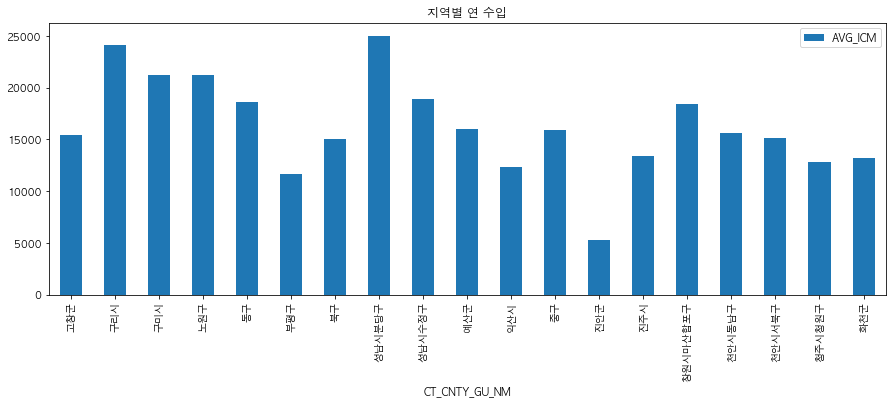

In [68]:
# Pivot Table로 구하기
data1 = pd.pivot_table(income, index = ["CT_CNTY_GU_NM"], values = ["AVG_ICM"], aggfunc = 'sum')
data1.plot.bar(figsize =(15, 5), title = "지역별 연 수입")


In [85]:
data1_asc = data1.sort_values(['AVG_ICM'])

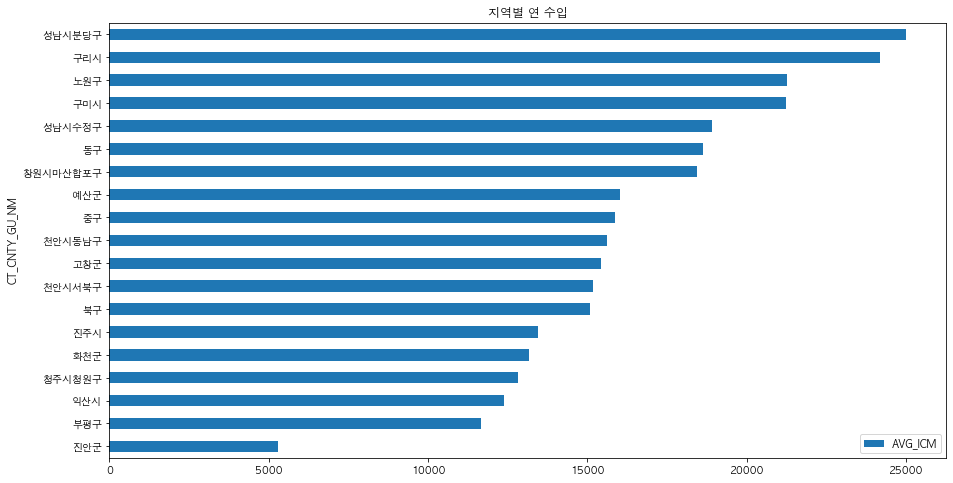

In [87]:
data1_asc.plot.barh(figsize =(15, 8), title = "지역별 연 수입")


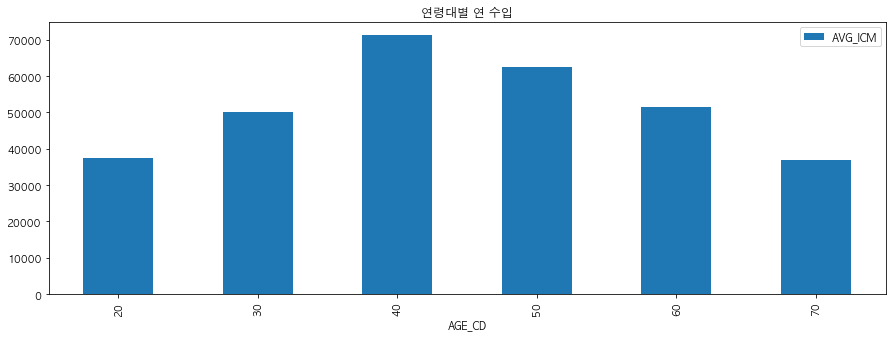

In [75]:
data2 = pd.pivot_table(income, index = ["AGE_CD"], values = ["AVG_ICM"], aggfunc = 'sum')
data2.plot.bar(figsize =(15, 5), title = "연령대별 연 수입")

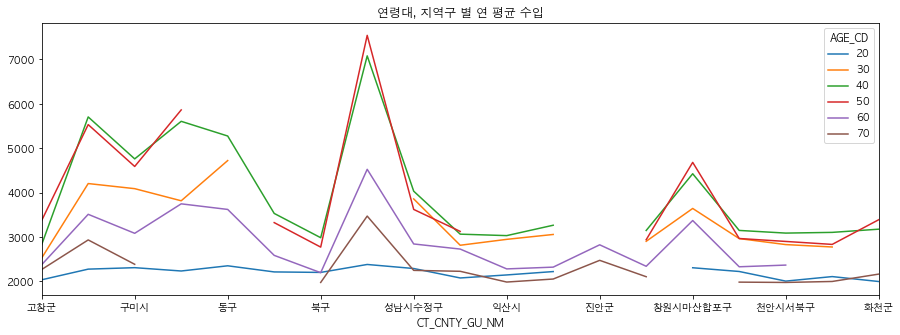

In [77]:
avg_income.plot.line(rot = 0, figsize = (15,5), title = "연령대, 지역구 별 연 평균 수입")


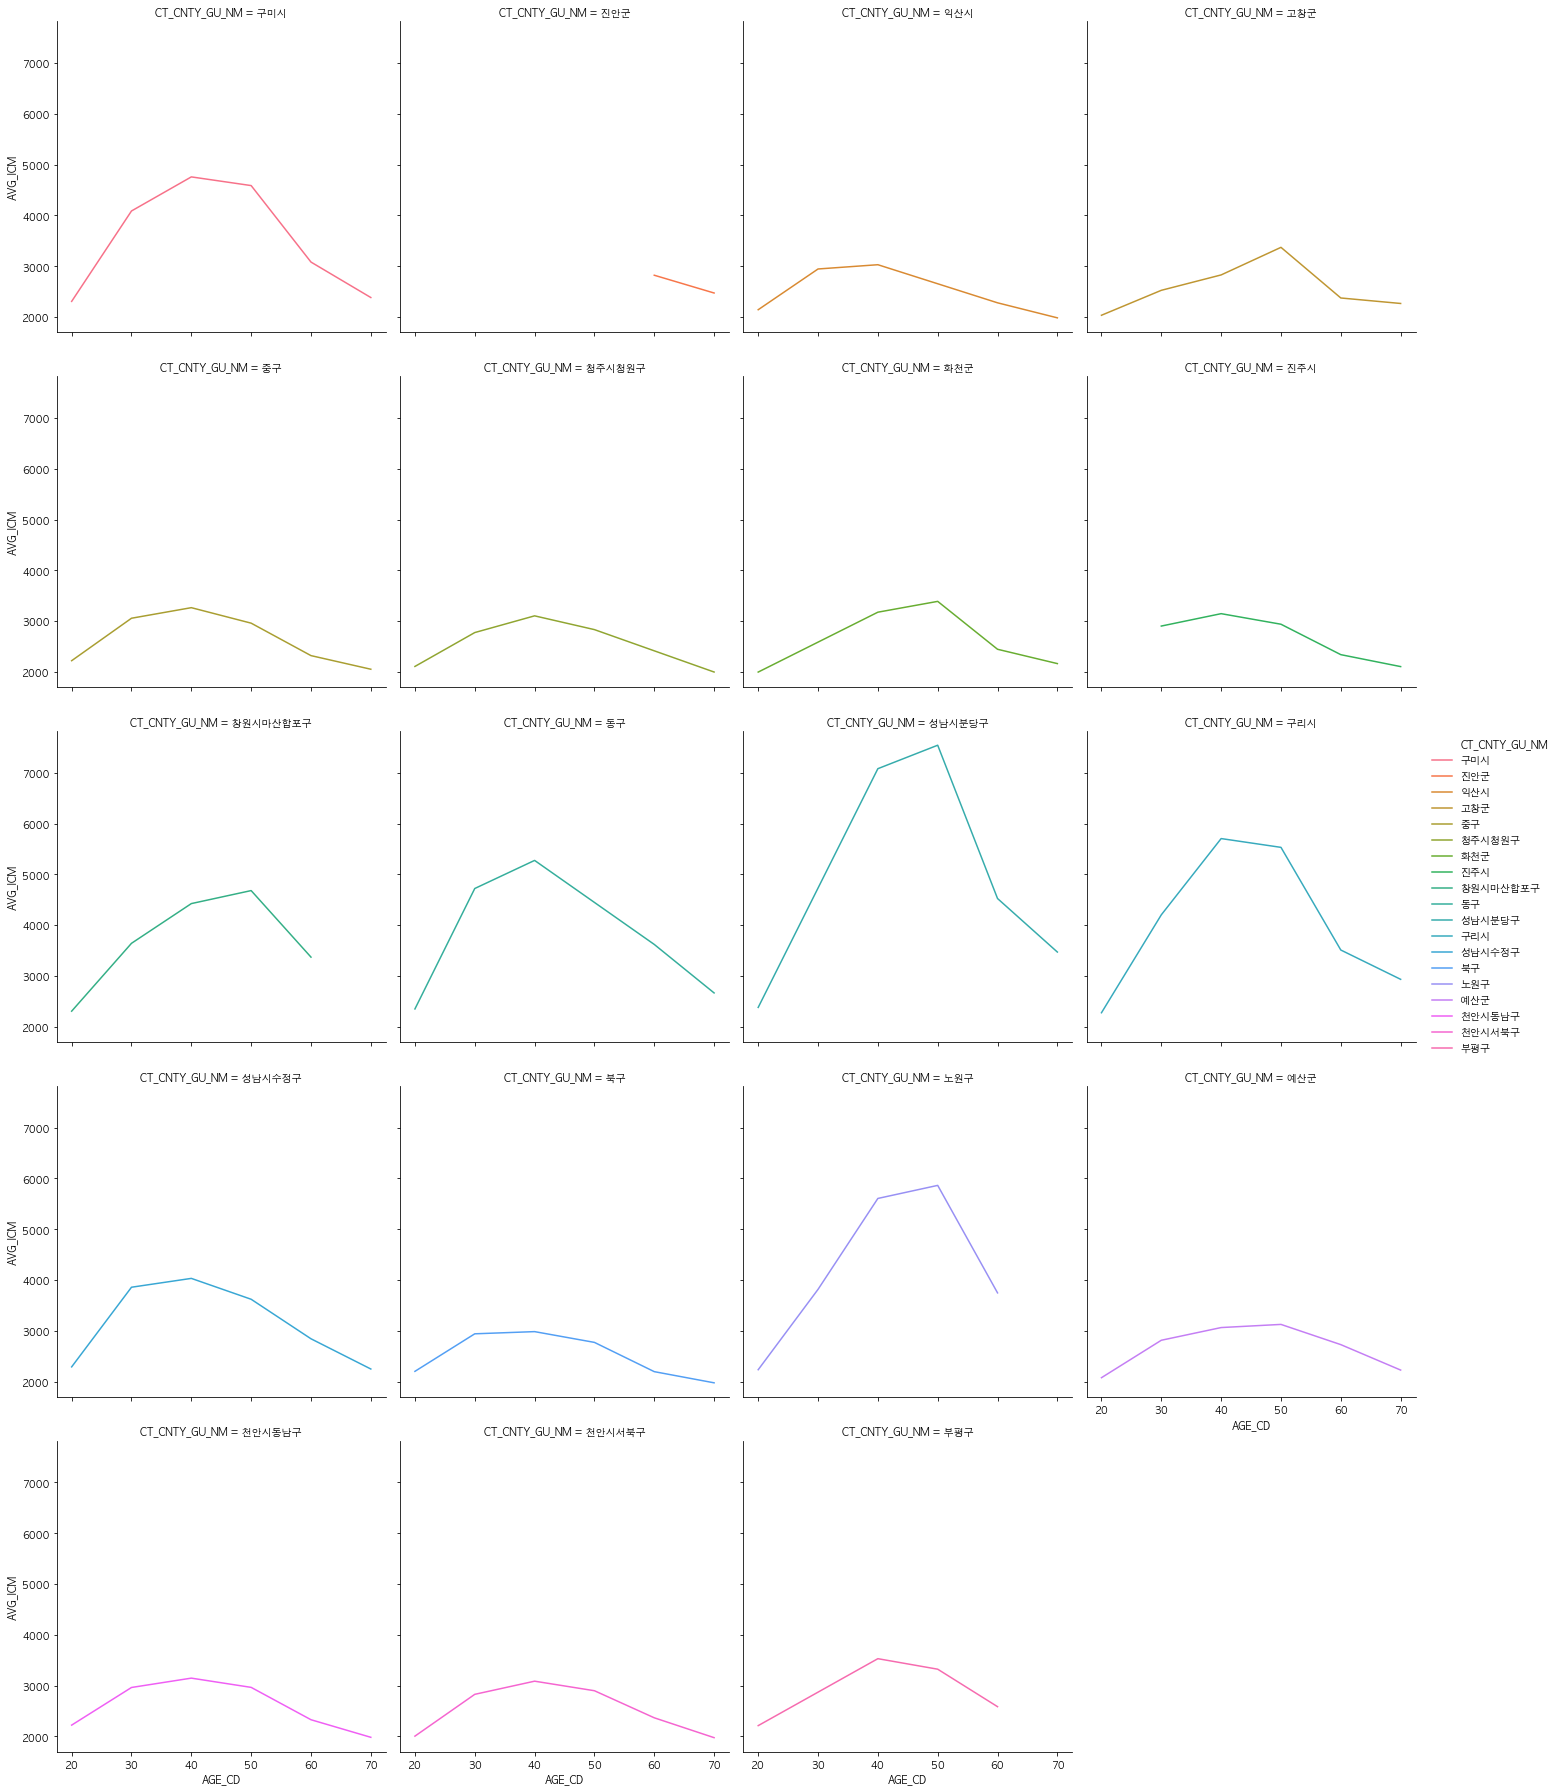

In [74]:
sns.relplot(data = income, x='AGE_CD', y = 'AVG_ICM', 
            hue = 'CT_CNTY_GU_NM', kind = 'line', col = 'CT_CNTY_GU_NM', col_wrap = 4)

In [55]:
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


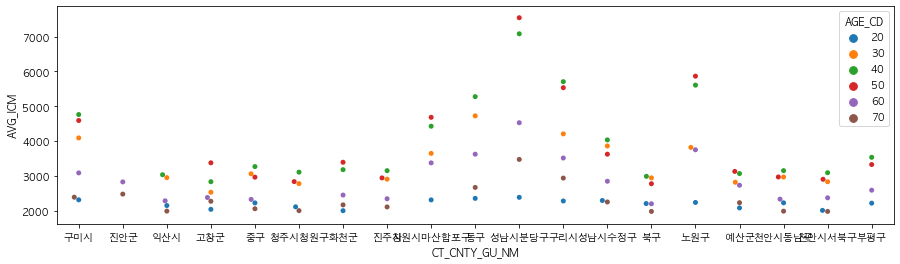

In [99]:
plt.figure(figsize = (15,4))
sns.swarmplot(data = income, x = 'CT_CNTY_GU_NM', y = 'AVG_ICM', hue = 'AGE_CD')


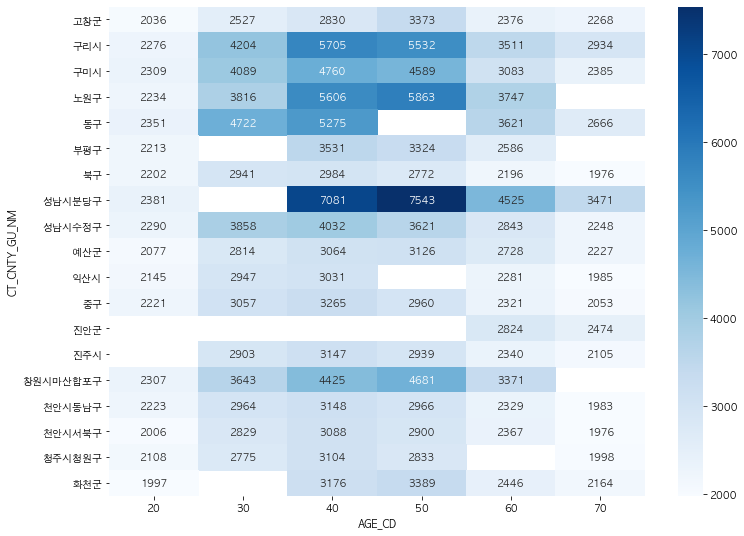

In [96]:
plt.figure(figsize = (12,9))
sns.heatmap(avg_income, cmap = "Blues", annot = True, fmt = ".0f")

## 데이터 빈도수 확인

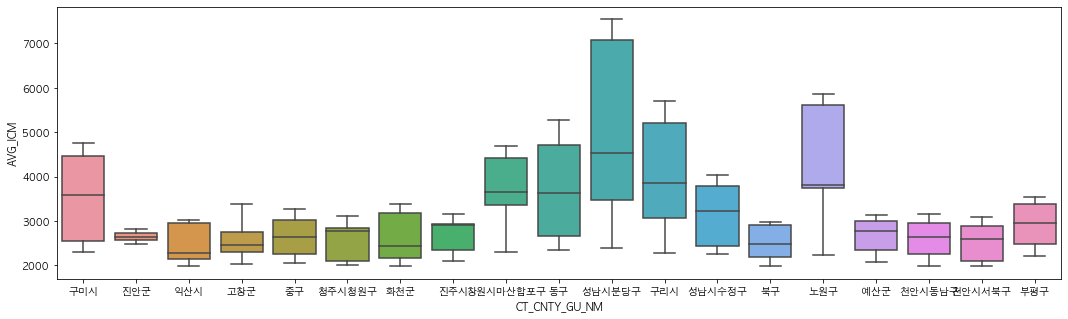

In [59]:
plt.figure(figsize=(18,5))
sns.boxplot(data = income, x= 'CT_CNTY_GU_NM', y ='AVG_ICM')

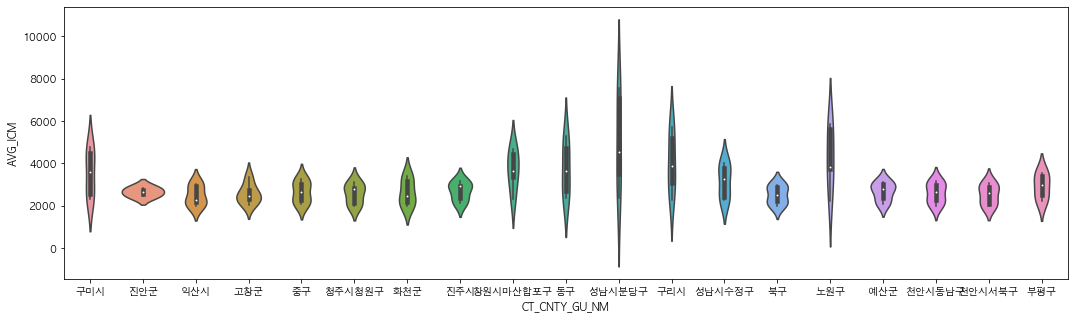

In [79]:
plt.figure(figsize= (18,5))
sns.violinplot(data = income, x = 'CT_CNTY_GU_NM', y = 'AVG_ICM')

## 상위소득자 평균연소득 (AVG_ICM_O70)



In [116]:
high_income = pd.pivot_table(income, index = ["CT_CNTY_GU_NM"], values = ["AVG_ICM_O70"], aggfunc = 'sum')
high_income_asc = high_income.sort_values(['AVG_ICM_O70'])
high_income_asc

,AVG_ICM_O70
CT_CNTY_GU_NM,
진안군,0.0
고창군,19937.0
화천군,20261.0
익산시,27459.0
진주시,28157.0
청주시청원구,31041.0
중구,35279.0
북구,35778.0
부평구,41558.0


<Figure size 720x720 with 0 Axes>

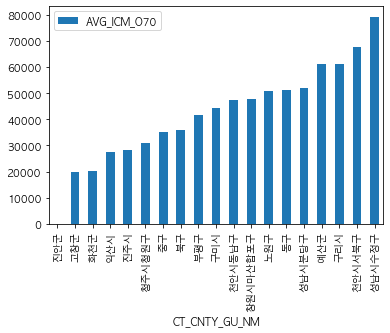

In [117]:
plt.figure(figsize =(10,10))
high_income_asc.plot.bar()

In [120]:
high_income = income.groupby(['CT_CNTY_GU_NM','AGE_CD'])['AVG_ICM_O70'].mean().round().unstack()
high_income

AGE_CD,20,30,40,50,60,70
CT_CNTY_GU_NM,,,,,,
고창군,NaN,NaN,NaN,19937.0,NaN,NaN
구리시,9299.0,10031.0,10067.0,10621.0,9668.0,11643.0
구미시,9065.0,8040.0,9297.0,9616.0,8443.0,NaN
노원구,9440.0,11200.0,10075.0,10113.0,10062.0,NaN
동구,8722.0,9669.0,10715.0,NaN,13306.0,8895.0
부평구,11820.0,NaN,9485.0,11403.0,8850.0,NaN
북구,NaN,8903.0,8000.0,11675.0,7200.0,NaN
성남시분당구,8320.0,NaN,10611.0,11820.0,10436.0,10901.0
성남시수정구,23690.0,11411.0,9933.0,10268.0,10112.0,13900.0


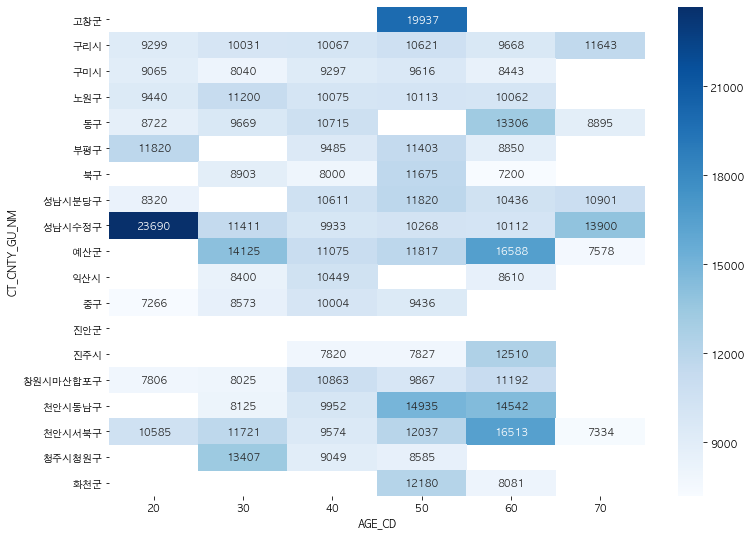

In [123]:
plt.figure(figsize = (12,9))
sns.heatmap(high_income, cmap = "Blues", annot = True, fmt = ".0f")

## 13.지역 단위 외국인 데이터

In [151]:
foreign = pd.read_csv('KCB 데이터/13_지역단위외국인.CSV')
foreign

,BS_YR_MON,GB,CT_PRVNC_CD,CT_PRVNC_NM,CT_CNTY_GU_CD,CT_CNTY_GU_NM,ADM_DONG_CD,ADM_DONG_NM,GENDER,AGE_CD,...,HOUS_BAL_CNT,AVG_BAL_AMT,AVG_BNK_BAL_AMT,AVG_NBNK_BAL_AMT,AVG_CRDT_BAL_AMT,AVG_HOUS_BAL_AMT,AVG_SCR,RT_SCR1,RT_SCR2,RT_SCR3
0,202001,ADM_DONG,29,광주광역시,29155,남구,29155537,봉선1동,1,40,...,0,0,0,0,0,0,5,0.14,0.86,0.00
1,202001,ADM_DONG,44,충청남도,44200,아산시,44200620,온양6동,2,60,...,1,4901,4901,0,0,4901,5,0.05,0.87,0.03
2,202001,ADM_DONG,41,경기도,41590,화성시,41590588,동탄4동,2,70,...,0,0,0,0,0,0,3,1.00,0.00,0.00
3,202001,ADM_DONG,41,경기도,41610,광주시,41610350,남종면,2,60,...,0,0,0,0,0,0,5,0.33,0.67,0.00
4,202001,ADM_DONG,41,경기도,41590,화성시,41590588,동탄4동,2,60,...,2,13539,13539,0,567,20026,4,0.39,0.61,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,202001,ADM_DONG,30,대전광역시,30230,대덕구,30230543,송촌동,1,50,...,0,0,0,0,0,0,4,0.43,0.57,0.00
96,202001,ADM_DONG,46,전라남도,46800,장흥군,46800350,유치면,2,20,...,0,0,0,0,0,0,5,0.00,1.00,0.00
97,202001,ADM_DONG,26,부산광역시,26230,부산진구,26230700,당감제4동,2,20,...,0,0,0,0,0,0,4,0.21,0.76,0.00
98,202001,ADM_DONG,47,경상북도,47730,의성군,47730420,단북면,2,40,...,0,0,0,0,0,0,4,0.00,1.00,0.00


In [127]:
foreign.columns

Index(['BS_YR_MON', 'GB', 'CT_PRVNC_CD', 'CT_PRVNC_NM', 'CT_CNTY_GU_CD',
       'CT_CNTY_GU_NM', 'ADM_DONG_CD', 'ADM_DONG_NM', 'GENDER', 'AGE_CD',
       'AVG_ICM', 'AVG_ICM_O70', 'MED_ICM', 'CD_CNT', 'SINCD_CNT', 'CHKCD_CNT',
       'AVG_SINCD_USE_AMT', 'AVG_CHKCD_USE_AMT', 'BAL_CNT', 'BNK_BAL_CNT',
       'NBNK_BAL_CNT', 'CRDT_BAL_CNT', 'HOUS_BAL_CNT', 'AVG_BAL_AMT',
       'AVG_BNK_BAL_AMT', 'AVG_NBNK_BAL_AMT', 'AVG_CRDT_BAL_AMT',
       'AVG_HOUS_BAL_AMT', 'AVG_SCR', 'RT_SCR1', 'RT_SCR2', 'RT_SCR3'],
      dtype='object')

In [128]:
foreign.isnull().sum()

BS_YR_MON             0
GB                    0
CT_PRVNC_CD           0
CT_PRVNC_NM           0
CT_CNTY_GU_CD         0
CT_CNTY_GU_NM         0
ADM_DONG_CD           0
ADM_DONG_NM           0
GENDER                0
AGE_CD                0
AVG_ICM               0
AVG_ICM_O70          95
MED_ICM               0
CD_CNT                0
SINCD_CNT             0
CHKCD_CNT             0
AVG_SINCD_USE_AMT     0
AVG_CHKCD_USE_AMT     0
BAL_CNT               0
BNK_BAL_CNT           0
NBNK_BAL_CNT          0
CRDT_BAL_CNT          0
HOUS_BAL_CNT          0
AVG_BAL_AMT           0
AVG_BNK_BAL_AMT       0
AVG_NBNK_BAL_AMT      0
AVG_CRDT_BAL_AMT      0
AVG_HOUS_BAL_AMT      0
AVG_SCR               0
RT_SCR1               0
RT_SCR2               0
RT_SCR3               0
dtype: int64

## 신용등급 알아보기

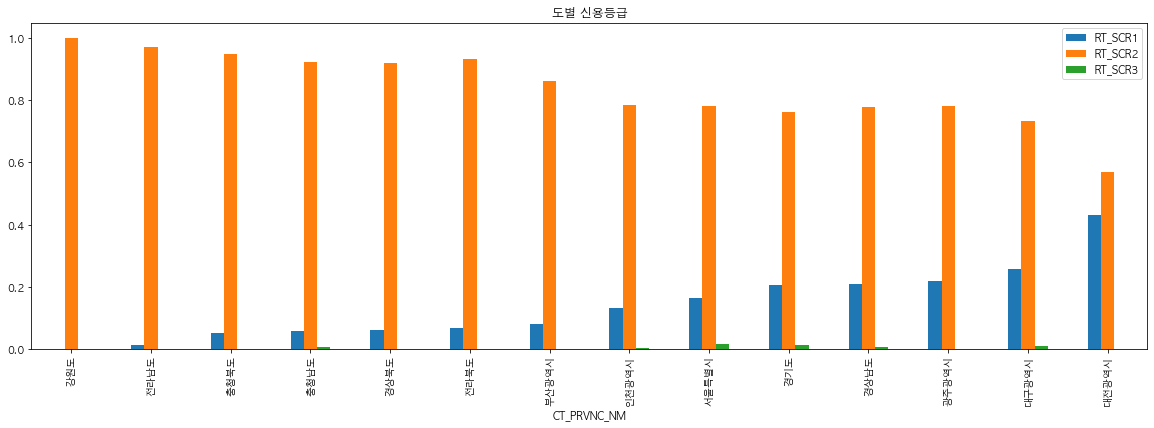

In [213]:
도별_신용등급 = pd.pivot_table(foreign, index = ["CT_PRVNC_NM"], values = ["RT_SCR1","RT_SCR2","RT_SCR3"])
도별_신용등급_오름차순 = 도별_신용등급.sort_values(['RT_SCR1'])
도별_신용등급_오름차순.plot.bar(figsize =(20, 6), title = "도별 신용등급")

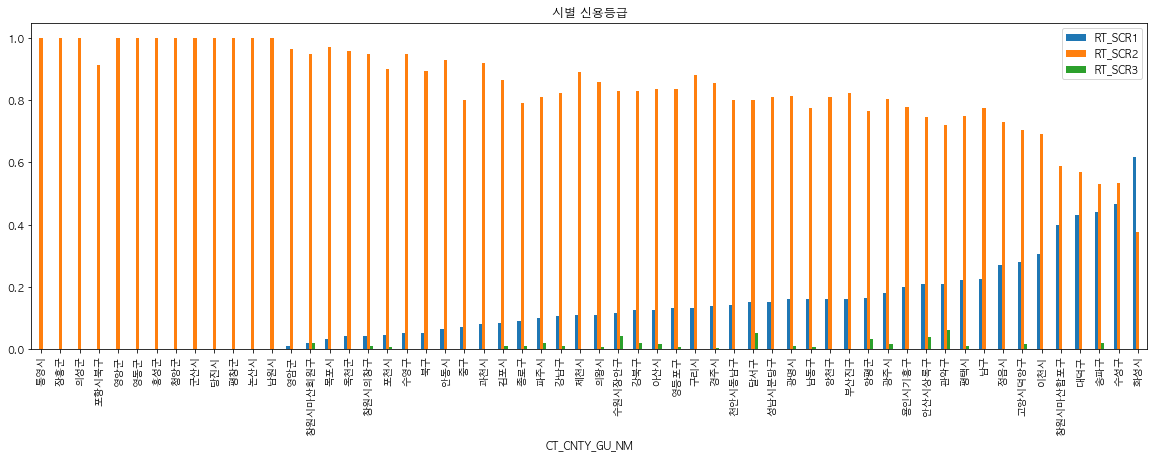

In [214]:
시별_신용등급 = pd.pivot_table(foreign, index = ["CT_CNTY_GU_NM"], values = ["RT_SCR1","RT_SCR2","RT_SCR3"])
시별_신용등급_오름차순 = 시별_신용등급.sort_values(['RT_SCR1'])
시별_신용등급_오름차순.plot.bar(figsize =(20, 6), title = "시별 신용등급")

In [217]:
도별_성별_신용등급 = pd.pivot_table(foreign, index = ["CT_PRVNC_NM", 'GENDER'], values = ["RT_SCR1","RT_SCR2","RT_SCR3"])
도별_성별_신용등급

RT_SCR1   RT_SCR2   RT_SCR3
CT_PRVNC_NM GENDER                              
강원도         2       0.000000  1.000000  0.000000
경기도         1       0.164667  0.793333  0.018667
            2       0.241250  0.735000  0.008125
경상남도        1       0.292500  0.707500  0.002500
            2       0.045000  0.920000  0.010000
경상북도        1       0.062500  0.930000  0.000000
            2       0.058571  0.914286  0.001429
광주광역시       1       0.217500  0.782500  0.000000
대구광역시       1       0.210000  0.780000  0.010000
            2       0.500000  0.500000  0.000000
대전광역시       1       0.430000  0.570000  0.000000
부산광역시       1       0.052000  0.882000  0.000000
            2       0.210000  0.760000  0.000000
서울특별시       1       0.222500  0.707500  0.025000
            2       0.121667  0.833333  0.010000
인천광역시       1       0.070000  0.800000  0.000000
            2       0.160000  0.775000  0.005000
전라남도        1       0.007500  0.965000  0.000000
            2       0.020000  0.980000  0.000000
전라북도        1       0.135000  0.865000  0.000000
            2       0.000000  1.000000  0.000000
충청남도        1       0.000000  1.000000  0.000000
            2       0.065000  0.911667  0.005000
충청북도        1       0.050000  0.950000  0.000000

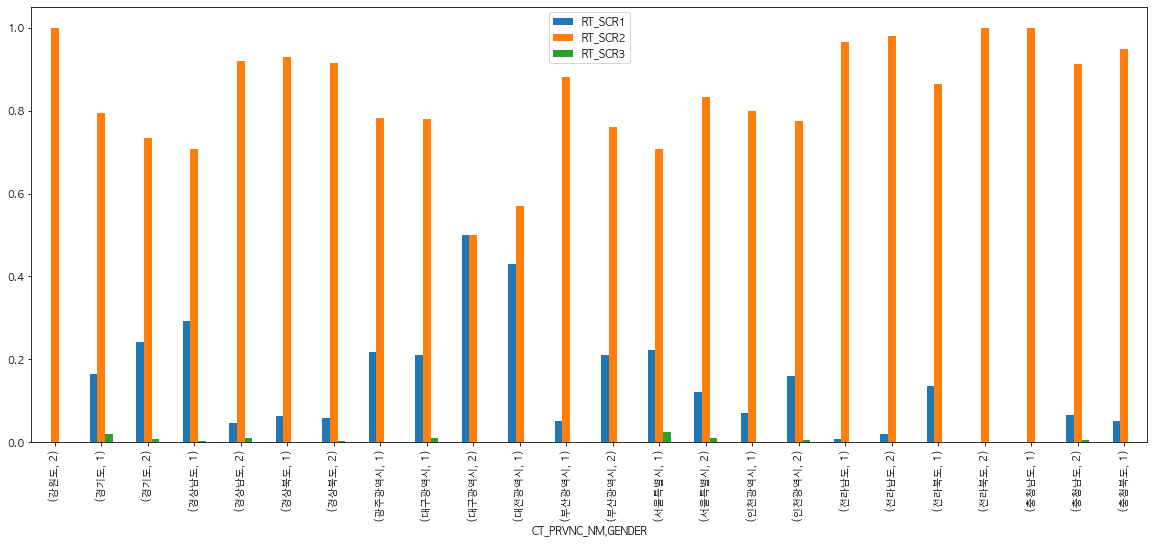

In [218]:
도별_성별_신용등급.plot.bar(figsize = (20, 8))

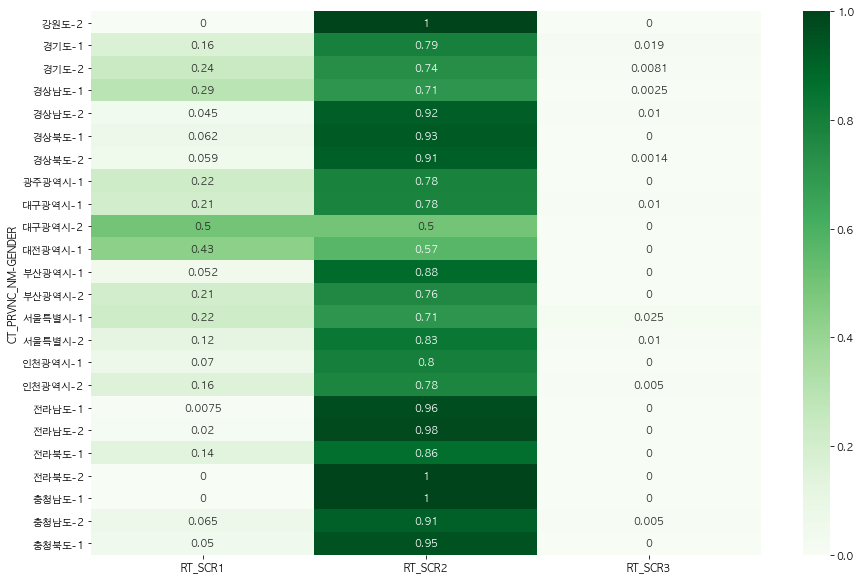

In [219]:
plt.figure(figsize = (15, 10))
sns.heatmap(도별_성별_신용등급, cmap = "Greens", annot = True)

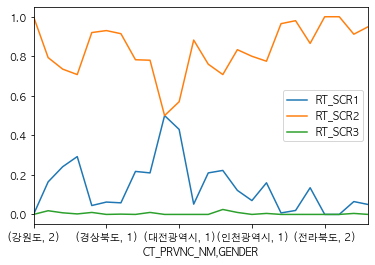

In [198]:
도별_성별_신용등급.plot()

In [220]:
도별_성별_신용등급_2 = foreign.groupby(['CT_PRVNC_NM','GENDER'])['RT_SCR1','RT_SCR2', 'RT_SCR3'].mean().unstack()
도별_성별_신용등급_2

RT_SCR1             RT_SCR2             RT_SCR3          
GENDER              1         2         1         2         1         2
CT_PRVNC_NM                                                            
강원도               NaN  0.000000       NaN  1.000000       NaN  0.000000
경기도          0.164667  0.241250  0.793333  0.735000  0.018667  0.008125
경상남도         0.292500  0.045000  0.707500  0.920000  0.002500  0.010000
경상북도         0.062500  0.058571  0.930000  0.914286  0.000000  0.001429
광주광역시        0.217500       NaN  0.782500       NaN  0.000000       NaN
대구광역시        0.210000  0.500000  0.780000  0.500000  0.010000  0.000000
대전광역시        0.430000       NaN  0.570000       NaN  0.000000       NaN
부산광역시        0.052000  0.210000  0.882000  0.760000  0.000000  0.000000
서울특별시        0.222500  0.121667  0.707500  0.833333  0.025000  0.010000
인천광역시        0.070000  0.160000  0.800000  0.775000  0.000000  0.005000
전라남도         0.007500  0.020000  0.965000  0.980000  0.000000  0.000000
전라북도         0.135000  0.000000  0.865000  1.000000  0.000000  0.000000
충청남도         0.000000  0.065000  1.000000  0.911667  0.000000  0.005000
충청북도         0.050000       NaN  0.950000       NaN  0.000000       NaN

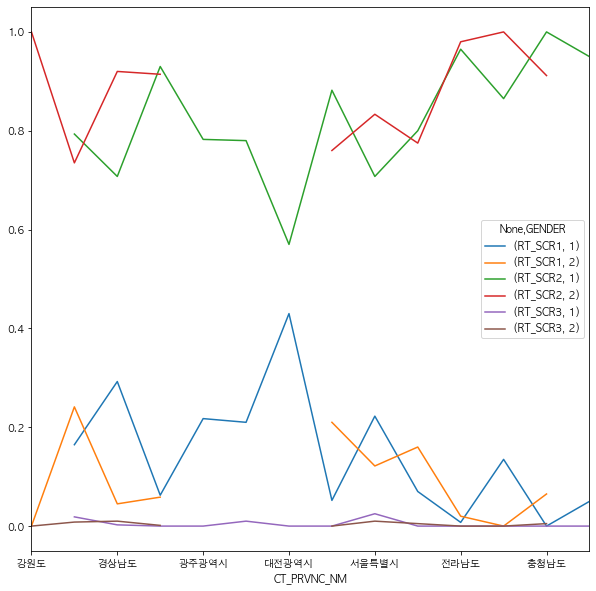

In [223]:
# 바로 어떻게 하지?
도별_성별_신용등급_2.plot(figsize = (10,10))

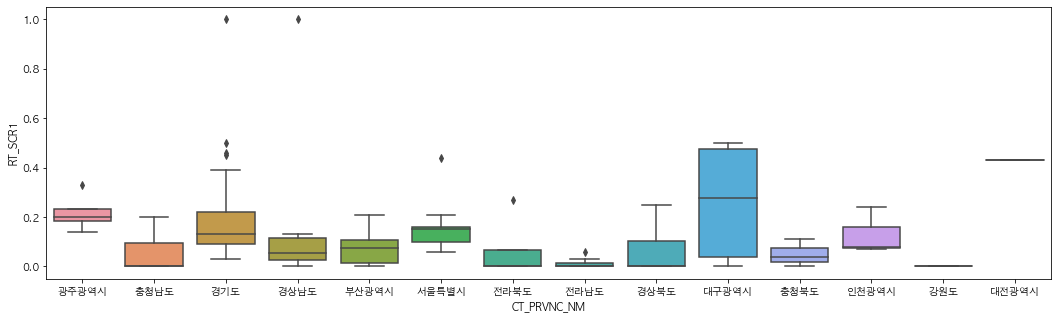

In [193]:
plt.figure(figsize=(18,5))
sns.boxplot(data = foreign, x= 'CT_PRVNC_NM', y ='RT_SCR1')

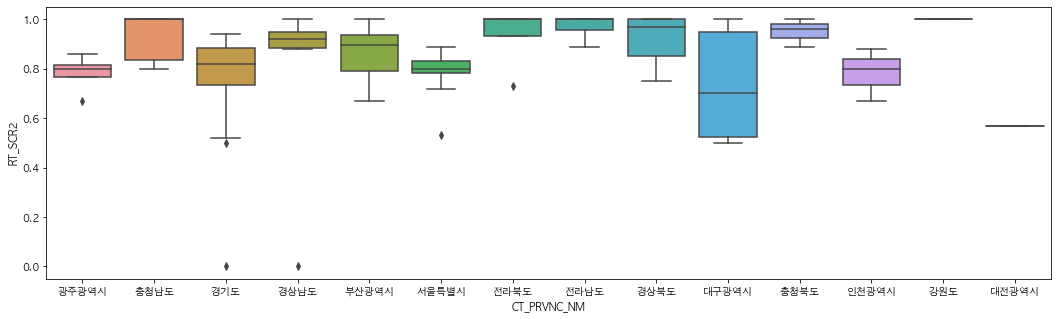

In [195]:
plt.figure(figsize=(18,5))
sns.boxplot(data = foreign, x= 'CT_PRVNC_NM', y ='RT_SCR2')

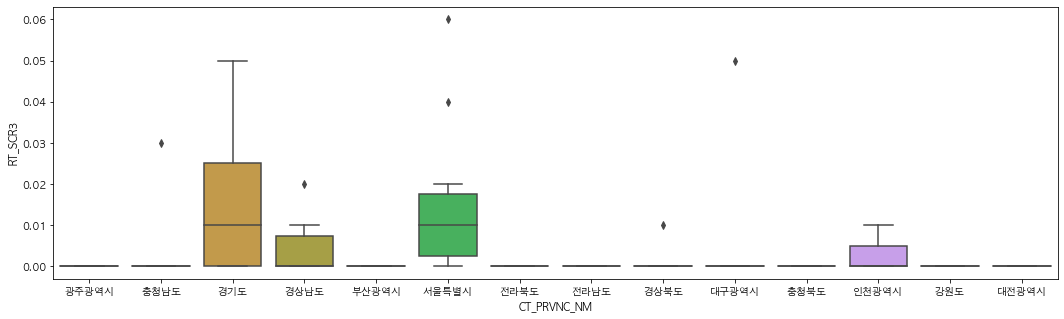

In [196]:
plt.figure(figsize=(18,5))
sns.boxplot(data = foreign, x= 'CT_PRVNC_NM', y ='RT_SCR3')